# Trading Strategies

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
pd.options.mode.chained_assignment = None
# Don't show the waring when writing in a copy slice, not the original data.

## Load data

In [7]:
dataset = pd.read_csv('AAPL.csv') 
dataset

,Open,High,Low,Close,Adj Close,Volume
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
3,0.947545,0.955357,0.848214,0.848214,0.721930,767972800
4,0.861607,0.901786,0.852679,0.888393,0.756128,460734400
...,...,...,...,...,...,...
5782,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
5783,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
5784,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
5785,127.989998,130.479996,127.730003,129.610001,129.412415,75703700


## Create features

In [8]:
dataset = dataset.dropna() 
dataset = dataset[['Open', 'High', 'Low', 'Close']]

dataset['H-L'] = dataset['High'] - dataset['Low'] 
dataset['O-C'] = dataset['Close'] - dataset['Open'] 
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean() 
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean() 

dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean() 
dataset['Std_dev']= dataset['Close'].rolling(5).std() 

dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,1.029018,1.070871,1.028460,1.062500,0.042411,0.033482,1.006138,0.973214,0.939639,0.033990,0
31,1.051339,1.054688,1.001116,1.018973,0.053572,-0.032366,1.022507,0.989955,0.941741,0.033357,1
32,1.028460,1.031250,1.010045,1.025670,0.021205,-0.002790,1.038504,1.003627,0.945201,0.033203,0
33,1.023438,1.030134,0.989955,0.993304,0.040179,-0.030134,1.035714,1.013951,0.948437,0.025057,1
34,0.983259,1.044085,0.952567,1.016183,0.091518,0.032924,1.012649,1.016853,0.953274,0.025057,1


## EDA

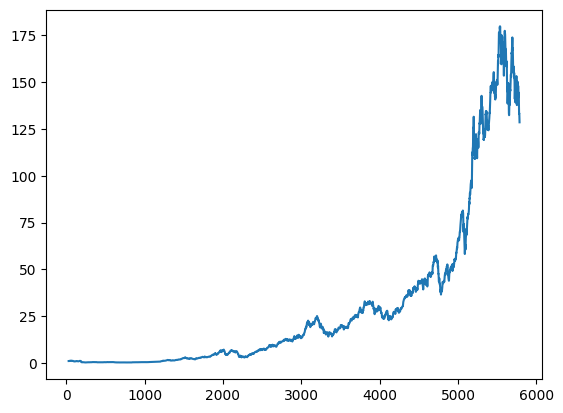

In [9]:
plt.figure()
plt.plot(dataset['3day MA'])
plt.show()

<AxesSubplot: xlabel='3day MA', ylabel='Density'>

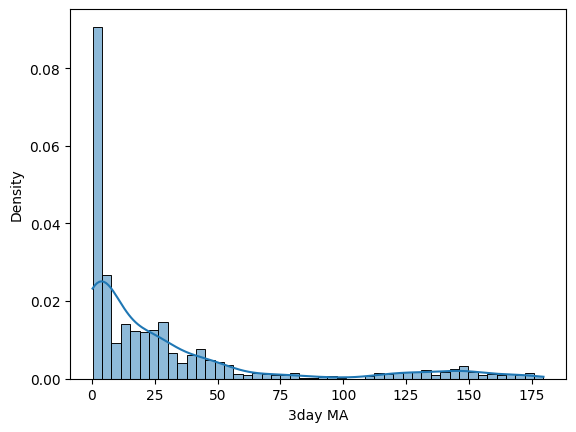

In [25]:
import seaborn as sns
sns.histplot(dataset,x="3day MA", kde=True, stat="density")

## Data preprocessing

In [10]:
# ‘X’ stores the input features, the columns starting from the fifth column (or index 4) of the
# dataset till the second last column. The last column will be stored in the dataframe y,
# which is the value we want to predict, i.e. the price rise.

X = dataset.iloc[:, 4:-1] 
y = dataset.iloc[:, -1]

In [11]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
30,0.042411,0.033482,1.006138,0.973214,0.939639,0.033990
31,0.053572,-0.032366,1.022507,0.989955,0.941741,0.033357
32,0.021205,-0.002790,1.038504,1.003627,0.945201,0.033203
33,0.040179,-0.030134,1.035714,1.013951,0.948437,0.025057
34,0.091518,0.032924,1.012649,1.016853,0.953274,0.025057
...,...,...,...,...,...,...
5782,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145
5783,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339
5784,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848
5785,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_test

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
4635,0.540001,0.087498,47.948334,47.247500,45.629833,0.709724
4636,0.465000,-0.169998,48.260000,47.418000,45.888500,0.381283
4637,0.557499,0.132500,48.395833,47.545500,46.136917,0.256884
4638,0.439999,-0.030003,48.261667,47.634250,46.365917,0.299545
4639,0.365002,0.222500,48.032500,47.700500,46.606833,0.290711
...,...,...,...,...,...,...
5782,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145
5783,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339
5784,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848
5785,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544


In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fit models

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [15]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.06      0.10       544
           1       0.53      0.95      0.68       608

    accuracy                           0.53      1152
   macro avg       0.52      0.50      0.39      1152
weighted avg       0.52      0.53      0.41      1152



## Feature importance

In [28]:
feature_names=X.columns

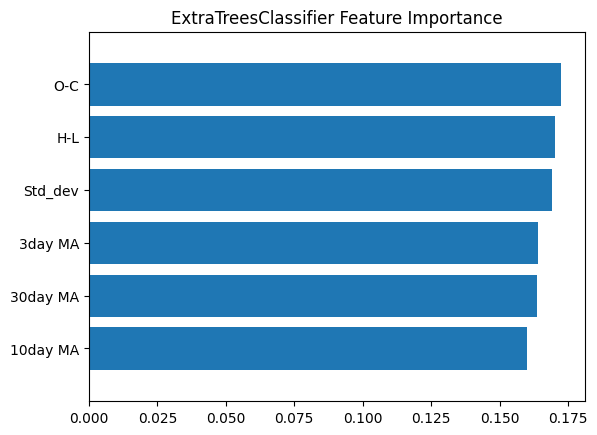

In [31]:
importance = classifier.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

## Trading strategies

Next, we create a new column in the dataframe dataset with the column header ‘Y_pred’
and store NaN values in the column. We then store the values of Y_pred into this new
column, starting from the rows of the test dataset. This is done by slicing the dataframe
using the iloc method as shown in the code above. We then drop all the NaN values

In [16]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
4635,48.407501,48.520000,47.980000,48.494999,0.540001,0.087498,47.948334,47.247500,45.629833,0.709724,0,1.0
4636,48.535000,48.549999,48.084999,48.365002,0.465000,-0.169998,48.260000,47.418000,45.888500,0.381283,0,1.0
4637,47.792500,48.000000,47.442501,47.924999,0.557499,0.132500,48.395833,47.545500,46.136917,0.256884,0,1.0
4638,47.837502,47.992500,47.552502,47.807499,0.439999,-0.030003,48.261667,47.634250,46.365917,0.299545,1,1.0
4639,47.847500,48.152500,47.787498,48.070000,0.365002,0.222500,48.032500,47.700500,46.606833,0.290711,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5782,130.919998,132.419998,129.639999,131.860001,2.779999,0.940002,133.326665,137.869000,144.147332,1.471145,0,1.0
5783,131.380005,131.410004,128.720001,130.029999,2.690002,-1.350006,133.179998,136.839000,143.646999,1.952339,0,1.0
5784,129.669998,131.029999,125.870003,126.040001,5.159996,-3.629997,131.373332,135.392999,142.991332,3.446848,1,1.0
5785,127.989998,130.479996,127.730003,129.610001,2.749992,1.620003,129.310000,133.449999,142.249999,2.462544,1,1.0
